# CRUD Basico para Modelo de Supply_Forecast.



In [ ]:
# LIBRERIAS NECESARIAS 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values
import psycopg2 as pg2    # Conectores para Postgres
import getpass  # Para obtener el usuario del sistema operativo

# Mostrar el DataFrame resultante
import ace_tools_open as tools

# Evitar Mensajes Molestos
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category= FutureWarning)

secrets = dotenv_values(".env")   # Connection String from .env
folder = secrets["FOLDER_DATOS"]

import uuid


### RUTINAS DEL CRUD

In [ ]:

# Funciones de conexión a la base de datos
def Open_Conn_Postgres():
    secrets = dotenv_values(".env")   # Cargar credenciales desde .env    
    conn_str = f"dbname={secrets['BASE4']} user={secrets['USUARIO4']} password={secrets['CONTRASENA4']} host={secrets['SERVIDOR4']} port={secrets['PUERTO4']}"
    try:    
        conn = pg2.connect(conn_str)
        return conn
    except Exception as e:
        print(f'Error en la conexión: {e}')
        return None

def Close_Connection(conn): 
    conn.close()
    return True

# Helper para generar identificadores únicos
def id_aleatorio():
    return str(uuid.uuid4())

# -----------------------------------------------------------
# 1. Operaciones CRUD para spl_supply_forecast_model
def create_model(active, description, method, name):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_model = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_model(
                id, active, description, method, name, "timestamp"
            )
            VALUES (%s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_model, active, description, method, name, timestamp))
        conn.commit()
        cur.close()
        return id_model
    except Exception as e:
        print(f"Error en create_model: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_model(model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, active, description, method, name, "timestamp"
            FROM public.spl_supply_forecast_model
            WHERE id = %s
        """
        cur.execute(query, (model_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "active": row[1],
                "description": row[2],
                "method": row[3],
                "name": row[4],
                "timestamp": row[5]
            }
        return None
    except Exception as e:
        print(f"Error en get_model: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_model(model_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(model_id)
        query = f"""
            UPDATE public.spl_supply_forecast_model
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_model(model_id)
    except Exception as e:
        print(f"Error en update_model: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_model(model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_model
            WHERE id = %s
        """
        cur.execute(query, (model_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_model: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 2. Operaciones CRUD para spl_supply_forecast_model_parameter
def create_model_parameter(data_type, default_value, is_public, is_public_required, is_required, name, supply_forecast_model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_param = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_model_parameter(
                id, data_type, default_value, is_public, is_public_required, is_required, name, "timestamp", supply_forecast_model_id
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        
        print("Query: ", query)
        
        cur.execute(query, (id_param, data_type, default_value, is_public, is_public_required, is_required, name, timestamp, supply_forecast_model_id))
        conn.commit()
        cur.close()
        return id_param
    except Exception as e:
        print(f"Error en create_model_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_model_parameter(param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, data_type, default_value, is_public, is_public_required, is_required, name, "timestamp", supply_forecast_model_id
            FROM public.spl_supply_forecast_model_parameter
            WHERE id = %s
        """
        cur.execute(query, (param_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "data_type": row[1],
                "default_value": row[2],
                "is_public": row[3],
                "is_public_required": row[4],
                "is_required": row[5],
                "name": row[6],
                "timestamp": row[7],
                "supply_forecast_model_id": row[8]
            }
        return None
    except Exception as e:
        print(f"Error en get_model_parameter: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_model_parameter(param_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(param_id)
        query = f"""
            UPDATE public.spl_supply_forecast_model_parameter
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_model_parameter(param_id)
    except Exception as e:
        print(f"Error en update_model_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_model_parameter(param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_model_parameter
            WHERE id = %s
        """
        cur.execute(query, (param_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_model_parameter: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 3. Operaciones CRUD para spl_supply_forecast_execution

def create_execution(description, name, supply_forecast_model_id, ext_supplier_code, supplier_id, supply_forecast_execution_status_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_execution = str(uuid.uuid4())  # Generar un UUID aleatorio
        timestamp = datetime.utcnow()

        query = """
            INSERT INTO public.spl_supply_forecast_execution(
                id, description, name, "timestamp", supply_forecast_model_id, 
                ext_supplier_code, supplier_id, supply_forecast_execution_status_id
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_execution, description, name, timestamp, supply_forecast_model_id, 
                            ext_supplier_code, supplier_id, supply_forecast_execution_status_id))
        conn.commit()
        cur.close()
        return id_execution
    except Exception as e:
        print(f"Error en create_execution: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution(execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, description, name, "timestamp", supply_forecast_model_id, 
                    ext_supplier_code, supplier_id, supply_forecast_execution_status_id
            FROM public.spl_supply_forecast_execution
            WHERE id = %s
        """
        cur.execute(query, (execution_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "description": row[1],
                "name": row[2],
                "timestamp": row[3],
                "supply_forecast_model_id": row[4],
                "ext_supplier_code": row[5],
                "supplier_id": row[6],
                "supply_forecast_execution_status_id": row[7]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution(execution_id, **kwargs):
    if not kwargs:
        print("No hay valores para actualizar")
        return None

    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(execution_id)

        query = f"""
            UPDATE public.spl_supply_forecast_execution
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()

        return get_execution(execution_id)  # Retorna la ejecución actualizada
    except Exception as e:
        print(f"Error en update_execution: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution(execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution
            WHERE id = %s
        """
        cur.execute(query, (execution_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

def get_excecution_by_status(status):
    if not status:
        print("No hay estados para filtrar")
        return None
    
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        query = f"""
        SELECT id, description, name, "timestamp", supply_forecast_model_id, ext_supplier_code, graphic, 
                monthly_net_margin_in_millions, monthly_purchases_in_millions, monthly_sales_in_millions, sotck_days, sotck_days_colors, 
                supplier_id, supply_forecast_execution_status_id
                FROM public.spl_supply_forecast_execution
                WHERE supply_forecast_execution_status_id = {status};
        """
        # Ejecutar la consulta SQL
        fexsts = pd.read_sql(query, conn)
        return fexsts
    except Exception as e:
        print(f"Error en get_excecution_status: {e}")
        return None
    finally:
        Close_Connection(conn)   

# -----------------------------------------------------------
# 4. Operaciones CRUD para spl_supply_forecast_execution_parameter
def create_execution_parameter(supply_forecast_execution_id, supply_forecast_model_parameter_id, value):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_exec_param = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_parameter(
                id, "timestamp", supply_forecast_execution_id, supply_forecast_model_parameter_id, value
            )
            VALUES (%s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_exec_param, timestamp, supply_forecast_execution_id, supply_forecast_model_parameter_id, value))
        conn.commit()
        cur.close()
        return id_exec_param
    except Exception as e:
        print(f"Error en create_execution_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_parameter(exec_param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_id, supply_forecast_model_parameter_id, value
            FROM public.spl_supply_forecast_execution_parameter
            WHERE id = %s
        """
        cur.execute(query, (exec_param_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_id": row[2],
                "supply_forecast_model_parameter_id": row[3],
                "value": row[4]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_parameter: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_parameter(exec_param_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause =  ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(exec_param_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_parameter
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_parameter(exec_param_id)
    except Exception as e:
        print(f"Error en update_execution_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_parameter(exec_param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_parameter
            WHERE id = %s
        """
        cur.execute(query, (exec_param_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_parameter: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 5. Operaciones CRUD para spl_supply_forecast_execution_execute
def create_execution_execute(end_execution, last_execution, start_execution, supply_forecast_execution_id, supply_forecast_execution_schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_exec = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute(
                id, end_execution, last_execution, start_execution, "timestamp", supply_forecast_execution_id, supply_forecast_execution_schedule_id
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_exec, end_execution, last_execution, start_execution, timestamp, supply_forecast_execution_id, supply_forecast_execution_schedule_id))
        conn.commit()
        cur.close()
        return id_exec
    except Exception as e:
        print(f"Error en create_execution_execute: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute(exec_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, end_execution, last_execution, start_execution, "timestamp", supply_forecast_execution_id, supply_forecast_execution_schedule_id
            FROM public.spl_supply_forecast_execution_execute
            WHERE id = %s
        """
        cur.execute(query, (exec_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "end_execution": row[1],
                "last_execution": row[2],
                "start_execution": row[3],
                "timestamp": row[4],
                "supply_forecast_execution_id": row[5],
                "supply_forecast_execution_schedule_id": row[6]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_execute: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute(exec_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(exec_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute(exec_id)
    except Exception as e:
        print(f"Error en update_execution_execute: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute(exec_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute
            WHERE id = %s
        """
        cur.execute(query, (exec_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 6. Operaciones CRUD para spl_supply_forecast_execution_execute_result
# -----------------------------------------------------------
def create_execution_execute_result(confidence_level, error_margin, expected_demand, average_daily_demand, lower_bound, upper_bound,
                                    product_id, site_id, supply_forecast_execution_execute_id, algorithm, average, ext_product_code, ext_site_code, ext_supplier_code,
                                    forcast, graphic, quantity_stock, sales_last, sales_previous, sales_same_year, supplier_id, windows, deliveries_pending):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_result = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute_result (
                id, confidence_level, error_margin, expected_demand, average_daily_demand, lower_bound, "timestamp", upper_bound, 
                product_id, site_id, supply_forecast_execution_execute_id, algorithm, average, ext_product_code, ext_site_code, ext_supplier_code, 
                forcast, graphic, quantity_stock, sales_last, sales_previous, sales_same_year, supplier_id, windows, 
                deliveries_pending
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_result, confidence_level, error_margin, expected_demand, average_daily_demand, lower_bound, timestamp, upper_bound, 
                            product_id, site_id, supply_forecast_execution_execute_id, algorithm, average, ext_product_code, ext_site_code, ext_supplier_code,
                            forcast, graphic, quantity_stock, sales_last, sales_previous, sales_same_year, supplier_id, windows, deliveries_pending))
        conn.commit()
        cur.close()
        return id_result
    except Exception as e:
        print(f"Error en create_execution_execute_result: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute_result(result_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT * FROM public.spl_supply_forecast_execution_execute_result
            WHERE id = %s
        """
        cur.execute(query, (result_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            columns = [desc[0] for desc in cur.description]
            return dict(zip(columns, row))
        return None
    except Exception as e:
        print(f"Error en get_execution_execute_result: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute_result(result_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(result_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute_result
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute_result(result_id)
    except Exception as e:
        print(f"Error en update_execution_execute_result: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute_result(result_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute_result
            WHERE id = %s
        """
        cur.execute(query, (result_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute_result: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)


# -----------------------------------------------------------
# 7. Operaciones CRUD para spl_supply_forecast_execution_schedule
def create_execution_schedule(supply_forecast_execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_schedule = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_schedule(
                id, "timestamp", supply_forecast_execution_id
            )
            VALUES (%s, %s, %s)
        """
        cur.execute(query, (id_schedule, timestamp, supply_forecast_execution_id))
        conn.commit()
        cur.close()
        return id_schedule
    except Exception as e:
        print(f"Error en create_execution_schedule: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_schedule(schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_id
            FROM public.spl_supply_forecast_execution_schedule
            WHERE id = %s
        """
        cur.execute(query, (schedule_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_id": row[2]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_schedule: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_schedule(schedule_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(schedule_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_schedule
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_schedule(schedule_id)
    except Exception as e:
        print(f"Error en update_execution_schedule: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_schedule(schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_schedule
            WHERE id = %s
        """
        cur.execute(query, (schedule_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_schedule: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 8. Operaciones CRUD para spl_supply_forecast_execution_execute_log
def create_execution_execute_log(supply_forecast_execution_execute_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_log = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute_log(
                id, "timestamp", supply_forecast_execution_execute_id
            )
            VALUES (%s, %s, %s)
        """
        cur.execute(query, (id_log, timestamp, supply_forecast_execution_execute_id))
        conn.commit()
        cur.close()
        return id_log
    except Exception as e:
        print(f"Error en create_execution_execute_log: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute_log(log_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_execute_id
            FROM public.spl_supply_forecast_execution_execute_log
            WHERE id = %s
        """
        cur.execute(query, (log_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_execute_id": row[2]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_execute_log: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute_log(log_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(log_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute_log
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute_log(log_id)
    except Exception as e:
        print(f"Error en update_execution_execute_log: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute_log(log_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute_log
            WHERE id = %s
        """
        cur.execute(query, (log_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute_log: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)


### MODELO DE DATOS
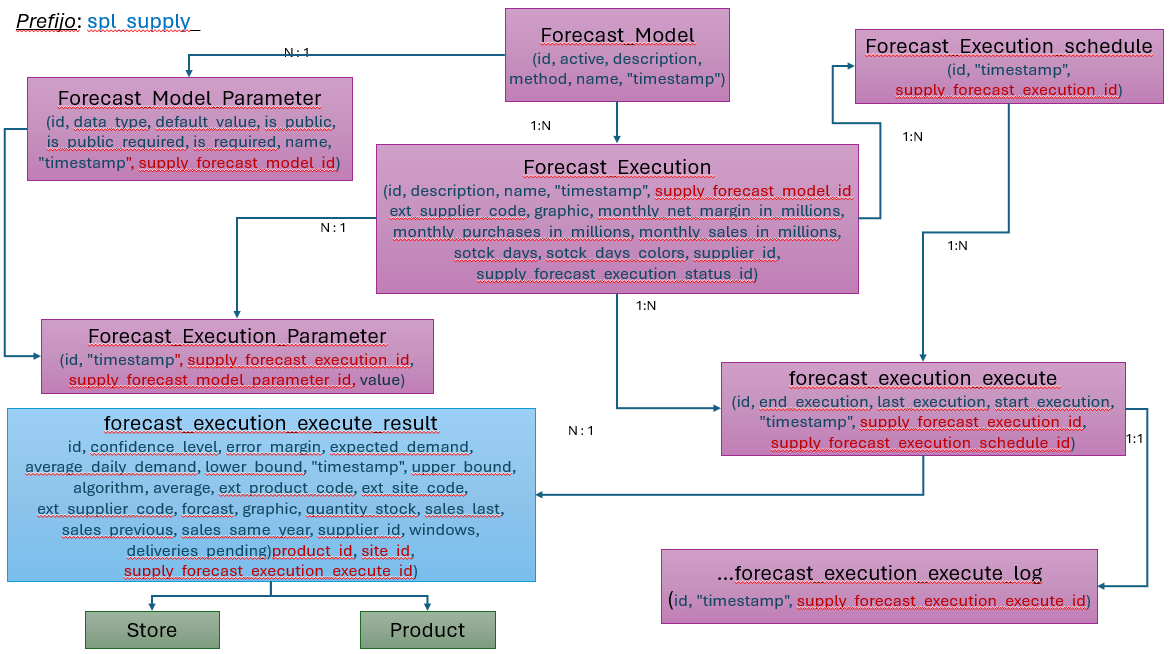

### DATOS


In [ ]:
planificador = [
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_05"},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_01", "f1": 90, "f2": 10, "f3": 20},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_04", "f1": 0.6},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_02"},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_03", "f1": 12, "f2": "add", "f3": "add"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :  "ALGO_05"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :  "ALGO_02"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :   "ALGO_01", "f1": 80, "f2": 10, "f3": 20},
    
    {"id": 62, "nombre": "ARCOR","label":"62_ARCOR", "label": "62_ARCOR", "ventana": 30, "algoritmo" : "ALGO_05"},
    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_01", "f1": 70, "f2": 10, "f3": 20},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_02"},    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_03", "f1": 12, "f2": "add", "f3": "add"},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_04", "f1": 0.6},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_05"},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_06"},

   {"id": 140, "nombre": "UNILEVER DE ARGENTINA S.A.", "label": "140_UNILEVER", "ventana": 30, "algoritmo" : "ALGO_05"},
    
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_05"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_06"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_01", "f1": 100, "f2": 10, "f3": 10},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_04", "f1": 0.3},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_03", "f1": 7, "f2": "add", "f3": "add"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_02"},

    {"id": 1465, "nombre": "QUICKFOOD S.A.", "label":"1465_QUICKFOOD", "ventana": 30, "algoritmo" : "ALGO_05"},
    
    {"id": 327, "nombre": "PALADINI S.A.", "label":"327_PALADINI", "ventana": 30, "algoritmo" : "ALGO_05"}
]

forecast_model =[
    # {"method": "ALGO_01", "description":"* Toma como base de cálculo el Período Actual de la Ventana de Reposición Definida. * El mismo período del mes anterior y * El mismo período del año anterior.  * Con los 3 valores hace un promedio simple ponderado",
    #  "name" :"Promedio Ponderado de Ventas de Periodos Anteriores factores (Actual, Anterior y Año Anterior)"},
    # {"method": "ALGO_02", "description":"usa regresión lineal múltiple para estimar la demanda futura en función de variables de ventas pasadas:",
    #  "name" :"Modelo de Regresión Lineal Doble considera  Tendencia (Holt)"},
    # {"method": "ALGO_03", "description":"El modelo HOLT WINTER  considera un valor típico (promedio), una pendiente (tendencia) a lo largo del tiempo y un patrón cíclico repetitivo (estacionalidad)",
    #  "name" :"Modelos Regresión Lineal Triple, Considera Estacionalidad y Tendencia (Holt-Winters)"},
    # {"method": "ALGO_04", "description":"El suavizado exponencial se refiere al uso de una media móvil ponderada exponencialmente (EWMA) para suavizar una serie temporal. El objetivo es identificar los 3 componentes de las series temporales.",
    #  "name" :"Modelo de Media Movil Exponencial Ponderada (EWMA) - SUAVIZADO EXPONENCIAL"},
    # {"method": "ALGO_05", "description":"Por lo relevado con los compradores es la forma en la que hoy compran. Toman la venta de los últimos 30 dias, la ven separada en 2 quincenas Se ecluyen del cálculo productos que no hayan tenido ventas en las últimas 2 ventanas",
    #  "name" :"Modelo PROMEDIO de VENTA SIMPLE - Promedio de Venta (PVS)"},
    {"method": "ALGO_06", "description":"Regresión Lineal DOBLE (HOLT) Sobre Períodos de Venta Semanales. Necesita Mínimo 4 períodos semanales para estimas",
     "name" :"Modelo de Regreción Lineal HOLT(Tendencia) Semanal"}
]

forecast_model_parameter =[
    #{"algoritmo": "ALGO_01", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"2_Factor_Actual", "data_type": "float", "default_value": 0.80, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"3_Factor_Previo", "data_type": "float", "default_value": 0.10, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"4_Factor_Año_Anterior", "data_type": "float", "default_value": 0.10, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    
    #{"algoritmo": "ALGO_02", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    #{"algoritmo": "ALGO_03", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"2_Periodos_Estacionalidad", "data_type": "int", "default_value": 7, "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"3_Efecto_Tendencia", "data_type": "str", "default_value": "add", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"4_Efecto_Estacionalidad", "data_type": "str", "default_value": "add", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    
    #{"algoritmo": "ALGO_04", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    #{"algoritmo": "ALGO_04", "name":"2_Factor_Alpha", "data_type": "float", "default_value": 0.6, "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    #{"algoritmo": "ALGO_05", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},  
    {"algoritmo": "ALGO_06", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "3aa89ac6-284c-4ba0-aea0-48dff2b500c9"}  
    
]

forecast_excecution = [
    
    # {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_01, f1: 90, f2: 10, f3: 20", "name":"20_MOLINOS_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    # {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_01, f1: 80, f2: 10, f3: 20", "name":"25_LA_VIRGINIA_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    # {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_01, f1: 100, f2: 10, f3: 10", "name":"189_BODEGAS_LOPEZ_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    # {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_01, f1: 70, f2: 10, f3: 20", "name":"98_FRATELLI_BRANCA_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
        
    # {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_02", "name": "25_LA_VIRGINIA_ALGO_02", "forecast_model_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    # {"description": "id: 456, label:456_LA_VIRGINIA, ventana: 30, algoritmo  : ALGO_03, f1: 70, f2: add, f3: add", "name": "456_LA_VIRGINIA_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    # {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_03, f1: 12, f2: add, f3: add", "name": "98_FRATELLI_BRANCA_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    # {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_03, f1: 7, f2: add, f3: add", "name": "189_BODEGAS_LOPEZ_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},

    # {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_04, f1: 0.6", "name": "20_MOLINOS_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    # {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_04, f1: 0.6", "name": "98_FRATELLI_BRANCA_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},    
    # {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_04, f1: 0.3", "name": "189_BODEGAS_LOPEZ_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    # {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_05", "name": "20_MOLINOS_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_05", "name": "25_LA_VIRGINIA_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 62, label:62_ARCOR, label 62_ARCOR, ventana: 30, algoritmo : ALGO_05", "name": "62_ARCOR_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_05", "name": "98_FRATELLI_BRANCA_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 140, label:140_UNILEVER, ventana: 30, algoritmo : ALGO_05", "name": "140_UNILEVER_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},    
    # {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_05","name": "189_BODEGAS_LOPEZ_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 327, label:327_PALADINI, ventana: 30, algoritmo : ALGO_05", "name": "327_PALADINI_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    # {"description": "id: 1465, label:1465_QUICKFOOD, ventana: 30, algoritmo : ALGO_05", "name": "1465_QUICKFOOD_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},

    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 50, algoritmo : ALGO_06", "name": "98449_CAGNOLI_ALGO_05", "forecast_model_id": "3aa89ac6-284c-4ba0-aea0-48dff2b500c9"},  
    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 50, algoritmo : ALGO_01, f1: 70, f2: 10, f3: 20", "name":"8449_CAGNOLI_BRANCA_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 30, algoritmo : ALGO_02", "name": "8449_CAGNOLI_ALGO_02", "forecast_model_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 30, algoritmo : ALGO_03, f1: 70, f2: add, f3: add", "name": "48449_CAGNOLI_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 30, algoritmo : ALGO_04, f1: 0.3", "name": "8449_CAGNOLI_LOPEZ_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    {"description": "id: 8449, label:8449_CAGNOLI, ventana: 30, algoritmo : ALGO_05", "name": "8449_CAGNOLI_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"}
    
]   

forecast_excecution_parameter =[
    {"algoritmo": "ALGO_01", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"2_Factor_Actual", "supply_forecast_model_parameter_id": "float", "value": 0.80, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"3_Factor_Previo", "supply_forecast_model_parameter_id": "float", "value": 0.10, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"4_Factor_Año_Anterior", "supply_forecast_model_parameter_id": "float", "value": 0.10, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    
    {"algoritmo": "ALGO_02", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    {"algoritmo": "ALGO_03", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"2_Periodos_Estacionalidad", "supply_forecast_model_parameter_id": "int", "value": 7, "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"3_Efecto_Tendencia", "supply_forecast_model_parameter_id": "str", "value": "add", "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"4_Efecto_Estacionalidad", "supply_forecast_model_parameter_id": "str", "value": "add", "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    
    {"algoritmo": "ALGO_04", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    {"algoritmo": "ALGO_04", "name":"2_Factor_Alpha", "supply_forecast_model_parameter_id": "float", "value": 0.6, "forecast_excecution_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    {"algoritmo": "ALGO_05", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "96f4dafb-258a-487f-93f2-dd20954c1958"}      
]

In [ ]:
conn =Open_Conn_Postgres()

query = """
SELECT table_schema, table_name 
FROM information_schema.tables 
WHERE table_name = 'spl_supply_forecast_model_parameter';
"""

  # Ejecutar la consulta SQL
datos = pd.read_sql(query, conn)

datos.head()

In [ ]:
# Ingresar FORECAST_MODEL

for record in forecast_model:
    create_model('TRUE', record["description"], record["method"], record["name"] )
    print (record["description"], record["method"], record["name"]) 
    print("-------------------")
    

In [ ]:
# Leer Dataframe de los FORECAST MODELS

conn =Open_Conn_Postgres()

query = """
SELECT id, active, description, method, name, "timestamp"
FROM public.spl_supply_forecast_model;
"""

  # Ejecutar la consulta SQL
modelos = pd.read_sql(query, conn)

modelos.head()

In [ ]:
# Ingresar MODEL_PARAMETER

for record in forecast_model_parameter:
    create_model_parameter(record["data_type"], record["default_value"], 'TRUE', 'TRUE', 'TRUE', record["name"], record["forecast_model_id"])  
    print(record["data_type"], record["default_value"], 'TRUE', 'TRUE', 'TRUE', record["name"], record["forecast_model_id"]) 
    print('------------------------------------------------------------------')
    

In [ ]:
forecast_excecution

In [4]:
import uuid
from datetime import datetime

def create_forecast_execution(conn,
                            name,
                            description,
                            model_id=None,
                            ext_supplier_code=None,
                            supplier_id=None,
                            status_id=1,
                            timestamp=None,
                            graphic=None,
                            net_margin=None,
                            purchases=None,
                            sales=None,
                            stock_days=None,
                            stock_colors=None):
    """
    Inserta un nuevo registro de ejecución de pronóstico en la tabla spl_supply_forecast_execution.

    Parámetros requeridos:
        - conn: conexión abierta a PostgreSQL
        - name: nombre del proceso (por ejemplo, 'Forecast Marzo 2025')
        - description: descripción detallada o etiqueta del proceso
        - status_id: estado de ejecución (por defecto: 1 = iniciado)
    
    Parámetros opcionales:
        - model_id: referencia al modelo utilizado
        - ext_supplier_code: código externo del proveedor
        - supplier_id: UUID del proveedor interno
        - timestamp: fecha/hora del proceso (default = now)
        - graphic: JSON o base64 para guardar imagen de análisis
        - net_margin, purchases, sales: métricas económicas en millones
        - stock_days: cantidad estimada de días de stock
        - stock_colors: codificación de stock para visualización
    """

    cur = conn.cursor()
    exec_id = str(uuid.uuid4())
    timestamp = timestamp or datetime.now()

    insert_sql = """
    INSERT INTO public.spl_supply_forecast_execution (
        id, name, description, "timestamp", 
        supply_forecast_model_id, ext_supplier_code, supplier_id,
        supply_forecast_execution_status_id,
        graphic, monthly_net_margin_in_millions, monthly_purchases_in_millions,
        monthly_sales_in_millions, sotck_days, sotck_days_colors
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """

    cur.execute(insert_sql, (
        exec_id,
        name,
        description,
        timestamp,
        model_id,
        ext_supplier_code,
        supplier_id,
        status_id,
        graphic,
        net_margin,
        purchases,
        sales,
        stock_days,
        stock_colors
    ))
    
    conn.commit()
    cur.close()
    return exec_id


In [11]:
conn = Open_Conn_Postgres()

forecast_id = create_forecast_execution(
    conn=conn,
    name="8449_CAGNOLI_ALGO_06",
    description="ModelodeRegreciónLinealHOLT(Tendencia)Semanal",
    model_id="93aa89ac6-284c-4ba0-aea0-48dff2b500c9",
    
    ext_supplier_code="8442",
    supplier_id="63e106bb-1179-4565-ac9f-a6a4be36d689",
    status_id=10,  # "iniciado"
    net_margin=10,
    purchases=10,
    sales=10,
    stock_days=10,
    stock_colors="verde"
)
print(f"✔️ Forecast creado con ID: {forecast_id}")

InvalidTextRepresentation: invalid input syntax for type uuid: "93aa89ac6-284c-4ba0-aea0-48dff2b500c9"
LINE 8: ...emanal', '2025-03-26T20:43:51.394804'::timestamp, '93aa89ac6...
                                                             ^


In [ ]:
# Ingresar FORECAST_EXECUTION

for record in forecast_excecution:
    create_forecast_execution(record["description"], record["name"], record["forecast_model_id"])
    print(record["description"], record["name"], record["forecast_model_id"]) 
    print('------------------------------------------------------------------')


In [ ]:
# Generar FORECAST_EXECUTION_PARAMETER a partir de model_parameter 

conn =Open_Conn_Connexa()
cur = conn.cursor()
query = """
-- Insertar registros generando el UUID en la sentencia
INSERT INTO public.spl_supply_forecast_execution_parameter (
    id,
    "timestamp",
    supply_forecast_execution_id,
    supply_forecast_model_parameter_id,
    value
)

SELECT
	uuid_generate_v4(),      -- Genera un UUID por cada fila
    fe."timestamp",          -- Toma el valor del timestamp de la tabla Forecast_Execution (o puede usarse now() )
    fe.id AS supply_forecast_execution_id,
    fmp.id AS supply_forecast_model_parameter_id,
    fmp.default_value AS value
FROM public.spl_supply_forecast_execution fe
JOIN public.spl_supply_forecast_model_parameter fmp
    ON fe.supply_forecast_model_id = fmp.supply_forecast_model_id;
"""
cur.execute(query)
conn.commit()
cur.close()


In [ ]:
import uuid
from datetime import datetime

def create_forecast_execution2(description, name, forecast_model_id, conn, status_id=1):
    """
    Inserta una nueva ejecución en la tabla spl_supply_forecast_execution usando un diccionario básico.

    Parámetros:
    - description: descripción de la ejecución (ej. "Pronóstico para marzo")
    - name: nombre de la ejecución (ej. "ALGO_01 Marzo")
    - forecast_model_id: UUID del modelo utilizado
    - conn: conexión abierta a PostgreSQL
    - status_id: estado inicial de ejecución (default = 1)
    """

    execution_id = str(uuid.uuid4())
    timestamp = datetime.now()

    sql = """
    INSERT INTO public.spl_supply_forecast_execution (
        id, description, name, "timestamp", supply_forecast_model_id, supply_forecast_execution_status_id
    ) VALUES (%s, %s, %s, %s, %s, %s);
    """

    with conn.cursor() as cur:
        cur.execute(sql, (
            execution_id,
            description,
            name,
            timestamp,
            forecast_model_id,
            status_id
        ))
        conn.commit()

    return execution_id


In [ ]:
# Asumimos que `forecast_excecution` es una lista de diccionarios con 3 claves:
# - description
# - name
# - forecast_model_id

conn = Open_Conn_Postgres()

for record in forecast_excecution:
    try:
        execution_id = create_forecast_execution2(
            description=record["description"],
            name=record["name"],
            forecast_model_id=record["forecast_model_id"],
            conn=conn
        )
        print(f"✔️ Ejecución creada: {execution_id} | {record['name']}")
    except Exception as e:
        print(f"❌ Error al crear ejecución para {record['name']}: {e}")
    print('------------------------------------------------------------------')

Close_Connection(conn)


In [ ]:
# Generar Excecution Schedule a partir de Execution


query = """
INSERT INTO public.spl_supply_forecast_execution_schedule(
	id, "timestamp", supply_forecast_execution_id)
	SELECT
	uuid_generate_v4(),      -- Genera un UUID por cada fila
    fe."timestamp",          -- Toma el valor del timestamp de la tabla Forecast_Execution (o puede usarse now() )
    fe.id AS supply_forecast_execution_id
	FROM public.spl_supply_forecast_execution fe
	WHERE fe.ext_supplier_code = '8442';
"""

# Ingresar FORECAST_EXECUTION_EXCECUTE a partir de Forecast_Execution + excecution_schedule

conn =Open_Conn_Connexa()
cur = conn.cursor()
query = """
-- Insertar registros generando el UUID en la sentencia
INSERT INTO public.spl_supply_forecast_execution_execute(
	id, end_execution, last_execution, start_execution, "timestamp", supply_forecast_execution_id, supply_forecast_execution_schedule_id)

SELECT
	uuid_generate_v4(),      -- Genera un UUID por cada fila
    fe."timestamp",
    TRUE,
    fe."timestamp",
    fe."timestamp",          -- Toma el valor del timestamp de la tabla Forecast_Execution (o puede usarse now() )
    fe.id AS supply_forecast_execution_id,
    fes.id AS supply_forecast_execution_schedule_id
    
FROM public.spl_supply_forecast_execution fe
JOIN public.spl_supply_forecast_execution_schedule fes
    ON fe.id = fes.supply_forecast_execution_id
WHERE fe.ext_supplier_code = '8442';
"""
cur.execute(query)
conn.commit()
cur.close()

In [ ]:
# Actualizar los ID de los proveedores

query = """
UPDATE public.spl_supply_forecast_execution AS sfe
SET supplier_id = fs.id
FROM public.fnd_supplier AS fs
WHERE sfe.ext_supplier_code = fs.ext_code;

"""

### CALCULAR Datos Complementarios FORECAST EXCECUTION

In [ ]:
lista_prov = [
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS"},   
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA"},     
    {"id": 62, "nombre": "ARCOR","label":"62_ARCOR", "label": "62_ARCOR"},    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA"},
    {"id": 140, "nombre": "UNILEVER DE ARGENTINA S.A.", "label": "140_UNILEVER"},    
    {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ"},
    {"id": 1465, "nombre": "QUICKFOOD S.A.", "label":"1465_QUICKFOOD"},    
    {"id": 327, "nombre": "PALADINI S.A.", "label":"327_PALADINI"}
]

In [ ]:
# Leer Dataframe de los SUPPLIERS

conn =Open_Conn_Postgres()

query = """
SELECT id, address, city, country, ext_code, name, state, tax_identification, "timestamp", zip_code, supplier_status_id
FROM public.fnd_supplier
WHERE ext_code IN ('20', '25', '62', '98', '140', '189', '1465', '327');

"""

  # Ejecutar la consulta SQL
suppliers = pd.read_sql(query, conn)

suppliers.head()


In [ ]:
# Leer Dataframe de los STORES

conn =Open_Conn_Postgres()

query = """
SELECT code, name, id FROM public.fnd_site
ORDER BY code 
"""

# Ejecutar la consulta SQL
stores = pd.read_sql(query, conn)
# Intentar convertir el campo 'code' a int, eliminando las filas que no se puedan convertir
stores = stores[pd.to_numeric(stores['code'], errors='coerce').notna()].copy()
stores['code'] = stores['code'].astype(int)

stores.head()

In [ ]:
# Leer Dataframe de los PRODUCTOS

conn =Open_Conn_Postgres()

query = """
SELECT ext_code, description, id FROM public.fnd_product
ORDER BY ext_code;
"""

# Ejecutar la consulta SQL
products = pd.read_sql(query, conn)

# Intentar convertir el campo 'code' a int, eliminando las filas que no se puedan convertir
products = products[pd.to_numeric(products['ext_code'], errors='coerce').notna()].copy()
products['ext_code'] = products['ext_code'].astype(int)

products.head()

In [ ]:
# Leer Dataframe de FORECAST EXECUTION 

conn =Open_Conn_Postgres()

query = """
SELECT id, description, name, "timestamp", supply_forecast_model_id, ext_supplier_code, graphic, 
        monthly_net_margin_in_millions, monthly_purchases_in_millions, monthly_sales_in_millions, sotck_days, sotck_days_colors, 
        supplier_id, supply_forecast_execution_status_id
	FROM public.spl_supply_forecast_execution;
"""

# Ejecutar la consulta SQL
fe = pd.read_sql(query, conn)
fe.head()

In [ ]:
# Leer Dataframe de FORECAST EXECUTION EXECUTE

conn =Open_Conn_Postgres()

query = """
SELECT fee.id, fee.supply_forecast_execution_id, fee.supply_forecast_execution_schedule_id,
	fe.description, fe.name
	FROM public.spl_supply_forecast_execution_execute fee
	JOIN public.spl_supply_forecast_execution fe
    ON fe.id = fee.supply_forecast_execution_id;
"""

# Ejecutar la consulta SQL
fee = pd.read_sql(query, conn)
fee.head()

In [ ]:
stores.info()

In [ ]:
id_proveedor = '20'
name= '20_MOLINOS'
forecast_execution_id ='c1cb2d47-d93f-4892-8aa9-1a8b790fcfe3'
forecast_execution_excecute_id ='46a3b044-ce8a-490b-a57c-5639f909a9dd'
supplier_id = 'f006a0c2-6da6-46d6-b014-a6de03cd522c'
algoritmo = '20_MOLINOS_ALGO_01'

In [ ]:
id_proveedor = '189'
name= '189_BODEGAS_LOPEZ'
forecast_execution_id ='28698426-7037-461b-b1e9-c2ba21031b6a'
forecast_execution_excecute_id ='ed7848d3-5dcb-41d2-9c36-0c4bdc468fbc'
supplier_id = '8e6e66f7-2482-451b-a656-5a1999343186'
algoritmo = '189_BODEGAS_LOPEZ_ALGO_05'

In [ ]:
id_proveedor = '189'
name= '189_BODEGAS_LOPEZ'
process_id ='747e5b07-82ab-4c4a-8dd6-17b1d20d30f2'
supplier_id = '8e6e66f7-2482-451b-a656-5a1999343186' 
algoritmo = '189_BODEGAS_LOPEZ_ALGO_05'
supply_forecast_execution_execute_id = 'ed7848d3-5dcb-41d2-9c36-0c4bdc468fbc'

In [ ]:


# Recuperar Solicitudes de Compra Extended
df_forecast_ext = pd.read_csv(f'{folder}/{algoritmo}_Pronostico_Extendido.csv')
df_forecast_ext['Codigo_Articulo']= df_forecast_ext['Codigo_Articulo'].astype(int)
df_forecast_ext['Sucursal']= df_forecast_ext['Sucursal'].astype(int)
df_forecast_ext.fillna(0)   # Por si se filtró algún missing value

print(f"-> Datos Recuperados del CACHE: {id_proveedor}, Label: {name}")

In [ ]:
# Mostrar la tabla con los gráficos en base64

tools.display_dataframe_to_user(name="Forecast", dataframe=df_forecast_ext)

In [ ]:
df_forecast_ext.info()

In [ ]:
# Definir el ID común para la inserción

# Iterar sobre el dataframe e insertar cada fila en la tabla
for _, row in df_forecast_ext.iterrows():
    create_execution_execute_result(
        confidence_level=0.9,  # Valor por defecto ya que no está en df_meged
        error_margin=0.07,  # Valor por defecto
        expected_demand=row['Forecast'],
        average_daily_demand=row['Average'],
        lower_bound=row['Q_DIAS_STOCK'],  # Valor por defecto
        upper_bound=row['Q_VENTA_DIARIA_NORMAL'],  # Valor por defecto
        product_id=row['product_id'],
        site_id=row['site_id'],
        supply_forecast_execution_execute_id=forecast_execution_excecute_id,
        algorithm=row['algoritmo'],
        average=row['Average'],
        ext_product_code=row['Codigo_Articulo'],
        ext_site_code=row['Sucursal'],
        ext_supplier_code=row['id_proveedor'],
        forcast=row['Q_REPONER_INCLUIDO_SOBRE_STOCK'],
        graphic=row['GRAFICO'],
        quantity_stock=row['Q_TRANSF_PEND'],  # Valor por defecto
        sales_last=row['ventas_last'],
        sales_previous=row['ventas_previous'],
        sales_same_year=row['ventas_same_year'],
        supplier_id=supplier_id,
        windows=row['ventana'],
        deliveries_pending=1  # Valor por defecto
    )


In [ ]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from IPython.display import display, Image

# Función para decodificar y mostrar una imagen en Jupyter Notebook
def mostrar_grafico_base64(base64_string):
    if base64_string is None:
        print("No hay gráfico disponible.")
        return
    
    img_data = base64.b64decode(base64_string)
    buffer = BytesIO(img_data)
    
    # Mostrar la imagen en Jupyter Notebook
    display(Image(buffer.getvalue()))

# Seleccionar un gráfico aleatorio para visualizar
fila_ejemplo = df_forecast_ext.dropna(subset=["GRAFICO"]).sample(5).iloc[0]
mostrar_grafico_base64(fila_ejemplo["GRAFICO"])

### EJECUCIÓN

In [ ]:
# -----------------------------------------------------------
# Ejemplo de uso (se recomienda adaptar y expandir según las necesidades)
if __name__ == '__main__':
    # Ejemplo para spl_supply_forecast_model_parameter
    model_id = create_model(True, "Modelo de ejemplo", "Método A", "Modelo 1")
    if model_id:
        param_id = create_model_parameter("int", "0", True, False, True, "Parámetro 1", model_id)
        print("Parámetro del modelo creado con ID:", param_id)
        parametro = get_model_parameter(param_id)
        print("Datos del parámetro obtenido:", parametro)
        parametro_actualizado = update_model_parameter(param_id, default_value="10")
        print("Parámetro actualizado:", parametro_actualizado)
        if delete_model_parameter(param_id):
            print("Parámetro eliminado correctamente.")
    
    # Ejemplo para spl_supply_forecast_execution y sus dependencias
    execution_id = create_execution("Ejecución de ejemplo", "Ejecución 1", model_id)
    if execution_id:
        exec_param_id = create_execution_parameter(execution_id, param_id, "25")
        print("Parámetro de ejecución creado con ID:", exec_param_id)
    
        # Crear un schedule para la ejecución
        schedule_id = create_execution_schedule(execution_id)
        print("Schedule creado con ID:", schedule_id)
    
        # Crear una ejecución execute asociada al schedule
        exec_execute_id = create_execution_execute(datetime.utcnow(), datetime.utcnow(), datetime.utcnow(), execution_id, schedule_id)
        print("Ejecución execute creada con ID:", exec_execute_id)
    
        # Crear un log para la ejecución execute
        log_id = create_execution_execute_log(exec_execute_id)
        print("Log de ejecución creado con ID:", log_id)
    
        # Crear un resultado para la ejecución execute
        result_id = create_execution_execute_result(0.95, 0.05, 100, 90, 110, "Prod123", "SiteABC", exec_execute_id)
        print("Resultado de ejecución creado con ID:", result_id)
    
